In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Step 1: Define star vectors as plane normal

In [2]:
thetas = np.array([0,1,2,3,4])/5*2*np.pi
e = np.array([[np.cos(x),np.sin(x)] for x in thetas])
alpha = np.array([2,2,2,2,2])/10
# sigma = np.array([3**(-3/2),3**(-3/2),3**(-3/2),3**(-3/2),3**(-3/2)])
# rho   = np.array([2**(-5/2),2**(-5/2),2**(-5/2),2**(-5/2),2**(-5/2)])
# sigma+rho

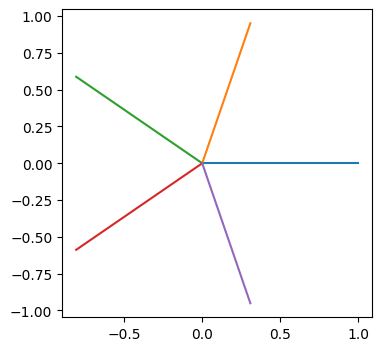

In [3]:
fig,ax = plt.subplots(1,1, figsize=[4, 4])

for i in range(len(thetas)):
    ax.plot([0,e[i,0]],[0,e[i,1]])
    
plt.show()

## Step 2: Generate duals from intersections

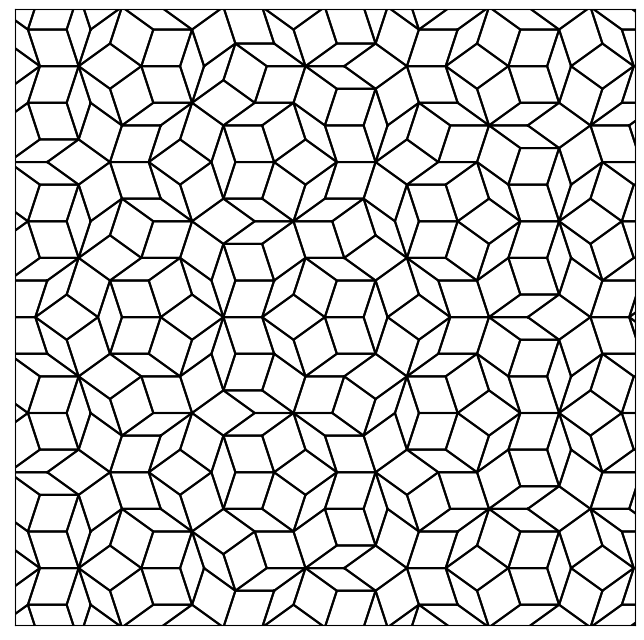

In [4]:
fig,ax = plt.subplots(1,1, figsize=[8, 8])

paircount = 0
for j in range(len(thetas)-1):
    for k in range(j+1,len(thetas)):
        paircount += 1

        l = [x for x in range(len(thetas)) if x not in [j,k]]
        
#         print('j,k = {}'.format([j,k]))
#         print('l = {}'.format(l))
        
        area_jk = (np.linalg.det(np.array([e[j,:],e[k,:]])))
        e_j_orth = np.array([[0,1],[-1,0]])@e[j,:]
        e_k_orth = np.array([[0,1],[-1,0]])@e[k,:]
        u_jk = e_j_orth/area_jk
        u_kj = e_k_orth/area_jk

        n_strips = 11
        n_c = (n_strips-1)/2

        for i_j in range(n_strips):
            for i_k in range(n_strips):
                
                n_j = i_j-n_c
                n_k = i_k-n_c
                
                x_n_j = n_j + alpha[j] #+ np.floor(n_j*sigma[j])/rho[j]
                x_n_k = n_k + alpha[k] #+ np.floor(n_k*sigma[k])/rho[k]

#                 n_l = [(np.floor(np.dot((x_n_j*u_jk + x_n_k*u_kj),e[x,:])-alpha[x])) for x in l]
#                 t_0 = n_j*e[j,:] + n_k*e[k,:] + sum([n_l[x]*e[l[x],:] for x in range(len(l))])

                e_zero = n_j*e[j,:] + n_k*e[k,:]
                
                for i_l in range(len(l)):
                    x_n_l = ((x_n_j/area_jk)*(np.dot(e_k_orth, e[l[i_l],:])) - 
                             (x_n_k/area_jk)*(np.dot(e_j_orth, e[l[i_l],:])))
                    e_zero += (np.floor(x_n_l - alpha[l[i_l]]))*e[l[i_l],:];
              
                t_0 = e_zero
                t_1 = t_0 - e[j,:]
                t_2 = t_0 - e[k,:]
                t_3 = t_0 - e[j,:] - e[k,:]

                ax.plot([t_0[0],t_1[0],t_3[0],t_2[0],t_0[0]],[t_0[1],t_1[1],t_3[1],t_2[1],t_0[1]],'-k')
                
ax.set_xlim(-8,8)
ax.set_ylim(-8,8)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

## Backups

In [5]:
                x_n_j = n_j + alpha[j] #+ np.floor(n_j*sigma[j])/rho[j]
                x_n_k = n_k + alpha[k] #+ np.floor(n_k*sigma[k])/rho[k]

#                 n_l = [(np.floor(np.dot((x_n_j*u_jk + x_n_k*u_kj),e[x,:])-alpha[x])) for x in l]
#                 t_0 = n_j*e[j,:] + n_k*e[k,:] + sum([n_l[x]*e[l[x],:] for x in range(len(l))])